<a href="https://colab.research.google.com/github/adrianre124/Python_Projects/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/digipok.zip'

Archive:  /content/drive/MyDrive/digipok.zip
   creating: test/digimon/
 extracting: test/digimon/100px-Shortmon.jpg  
  inflating: test/digimon/101px-PawnShoutmon_Toei_Art.jpg  
  inflating: test/digimon/105px-Blackseraphimon.gif  
  inflating: test/digimon/105px-Mother_D-Reaper.jpg  
  inflating: test/digimon/106px-Gladimon.jpg  
  inflating: test/digimon/108px-Dreaper_adr_07.jpg  
  inflating: test/digimon/111px-Dreaper_adr_06.jpg  
 extracting: test/digimon/113px-V-TamerHotBlooded_Lykamon.jpg  
  inflating: test/digimon/114px-Gattai_Lilithmon.png  
  inflating: test/digimon/114px-Gravimon_darkness.jpg  
  inflating: test/digimon/116px-Executor.jpg  
  inflating: test/digimon/119px-Exogrimmon.jpg  
  inflating: test/digimon/120px-Addmon.jpg  
  inflating: test/digimon/120px-Aegiochusmon.jpg  
  inflating: test/digimon/120px-Aegiochusmon_blue2.jpg  
  inflating: test/digimon/120px-Aegiochusmon_dark.jpg  
  inflating: test/digimon/120px-Aegiochusmon_green.jpg  
  inflating: test/digim

In [ ]:
from pathlib import Path
path = Path('/content/train/')
path.ls()

(#2) [Path('/content/train/digimon'),Path('/content/train/pokemon')]

In [ ]:
path = Path('/content/')
data = ImageDataLoaders.from_folder(path, train='train', valid='valid', size=224, bs=64, num_workers=8, item_tfms=Resize(224, 224))

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
print(data.vocab)
print(len(data.train_ds), len(data.valid_ds))

['digimon', 'pokemon']
1232 355


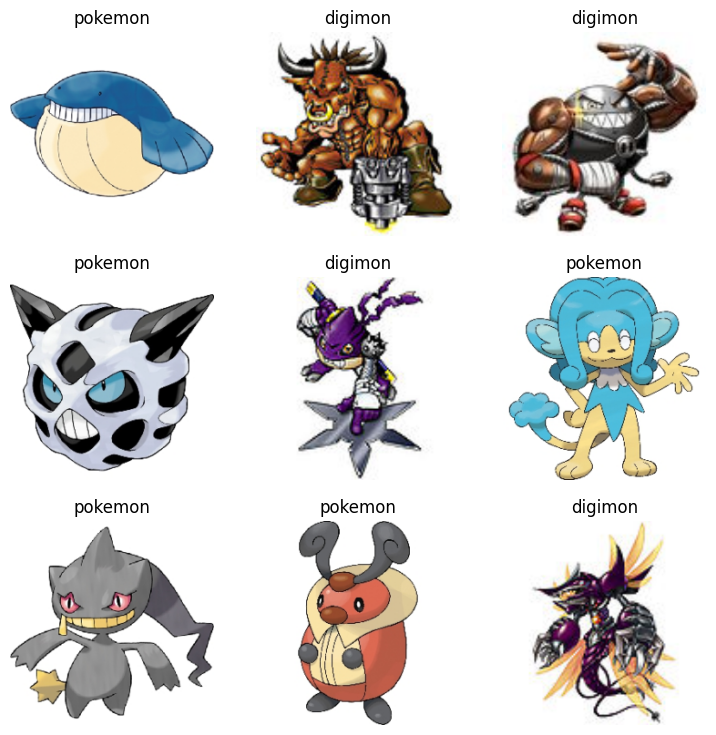

In [ ]:
data.show_batch()

In [ ]:
learn = vision_learner(dls=data, arch=models.resnet18, metrics=[accuracy, error_rate])

In [ ]:
model = cnn_learner(data, models.resnet18, metrics = [accuracy, error_rate])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
model.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.402694,0.051540,0.980282,0.019718,04:36


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.026283,0.008458,0.997183,0.002817,06:21


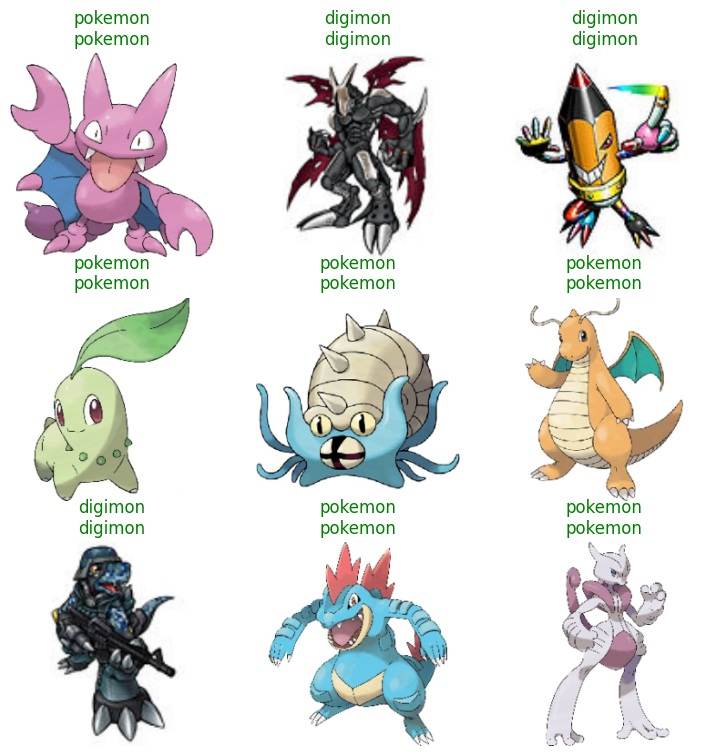

In [ ]:
model.show_results()